<a href="https://colab.research.google.com/github/AsadiAhmad/Car-Counter-Morphology/blob/main/Code/Car_Counter_Morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Step 2: Download Pictures

In [ ]:
!wget https://raw.githubusercontent.com/AsadiAhmad/Car-Counter-Morphology/main/Pictures/Cars.jpg -O Cars.jpg

--2025-05-10 07:57:02--  https://raw.githubusercontent.com/AsadiAhmad/Car-Counter-Morphology/main/Pictures/Cars.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42284 (41K) [image/jpeg]
Saving to: ‘Cars.jpg’

Cars.jpg            100%[===================>]  41.29K  --.-KB/s    in 0.01s   

2025-05-10 07:57:02 (3.29 MB/s) - ‘Cars.jpg’ saved [42284/42284]



# Step 3: Load Images

In [ ]:
cars = cv.imread("Cars.jpg", cv.IMREAD_GRAYSCALE)

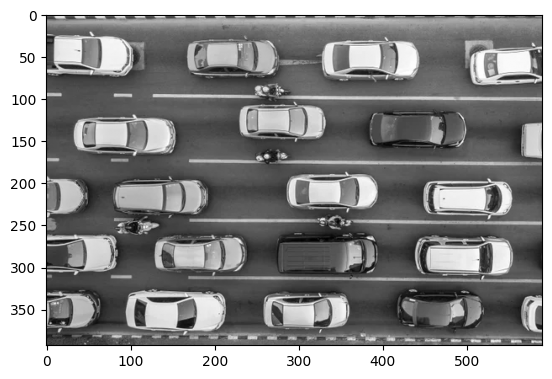

In [ ]:
plt.imshow(cars, cmap="gray")

# Step 4: Crop Image

In [ ]:
height, width =cars.shape
cropped_cars = cars[15:height-15, :]

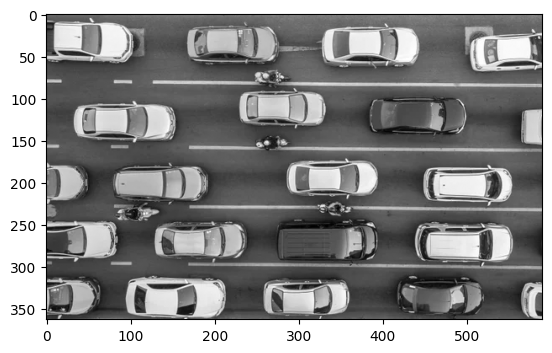

In [ ]:
plt.imshow(cropped_cars, cmap="gray")

# Step 5: Blur Image

In [ ]:
blurred_cars = cv.GaussianBlur(cropped_cars, (51, 51), 0)

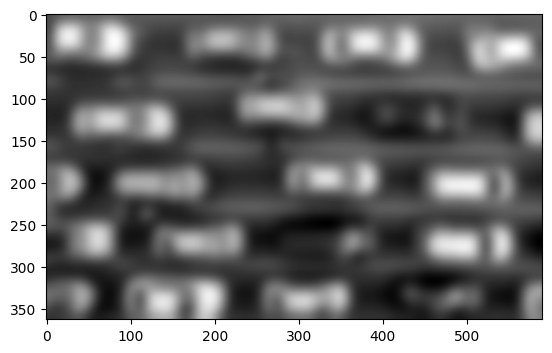

In [ ]:
plt.imshow(blurred_cars, cmap="gray")

# Step 6: Binarization

In [ ]:
bin_cars = np.where(blurred_cars > 127, 255, 0)

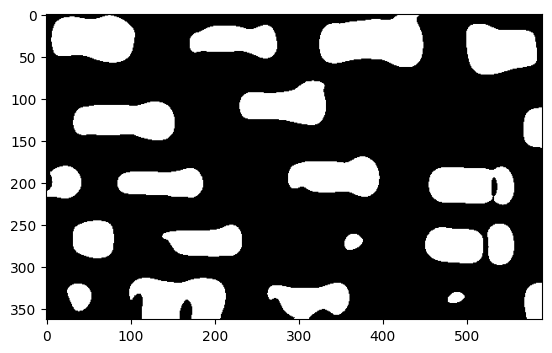

In [ ]:
plt.imshow(bin_cars, cmap="gray")

# Step 6: Transform Grayscale to Binary

In [ ]:
scaled_cars = bin_cars.astype(np.uint8)

# Step 7: Dilation for Connecting Car Parts

In [ ]:
kernel = np.ones((3, 3), np.uint8)
car_dilate = cv.dilate(scaled_cars, kernel, iterations = 6)

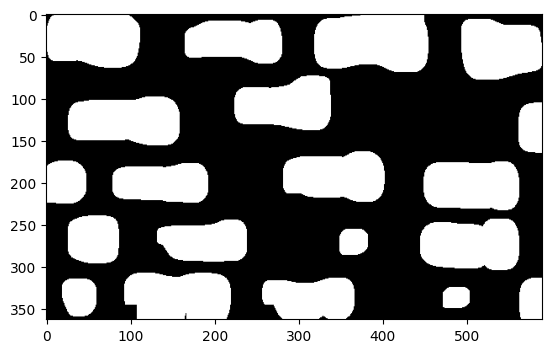

In [ ]:
plt.imshow(car_dilate, cmap="gray")

# Step 8: Counting Cars

In [ ]:
num_labels, labels = cv.connectedComponents(car_dilate)
car_count = num_labels - 1

In [ ]:
print(car_count)

20


# Step 9: Calculating Accuracy

In [ ]:
percent = (car_count/21)*100
print(f'{percent:.2f}%')

95.24%
